In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
path = "C:/Users/shawn/OneDrive/Documents/GitHub/ML-Crate/Dataset/"
news = pd.read_csv(path + "economic_calendar_19_24.csv")
gold_price = pd.read_csv(path + "gold_price_19_24.csv")
news

,Day,Date,Hour,Country,Event,Actual,Previous,Consensus,Forecast
0,Tuesday,01/01/19,20:45,CN,Caixin Manufacturing PMI DEC,49.7,50.2,50.1,50.1
1,Friday,01/04/19,8:30,US,Non Farm Payrolls DEC,312K,176K,177K,165K
2,Sunday,01/06/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN
3,Monday,01/07/19,10:00,CA,Ivey PMI s.a DEC,59.7,57.2,56.8,56.7
4,Monday,01/07/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1871,Thursday,11/30/23,8:30,US,Personal Income MoM OCT,0.002,0.40%,0.002,0.003
1872,Thursday,11/30/23,8:30,US,Personal Spending MoM OCT,0.002,0.70%,0.002,0.004
1873,Thursday,11/30/23,20:45,CN,Caixin Manufacturing PMI NOV,50.7,49.5,49.8,49.8
1874,Friday,12/01/23,8:30,CA,Unemployment Rate NOV,0.058,5.70%,0.058,0.058


In [3]:
gold_price

,Date,Price,Open,High,Low,Vol_K,Change_percent
0,12/01/2023,2089.7,2056.5,2095.7,2052.6,241.62,1.58
1,11/30/2023,2057.2,2065.4,2067.4,2051.2,151.92,-0.48
2,11/29/2023,2067.1,2062.0,2072.7,2055.9,197.79,0.81
3,11/28/2023,2050.5,2025.0,2054.4,2022.9,1.86,1.35
4,11/27/2023,2023.1,2012.9,2027.5,2012.7,1.06,0.47
...,...,...,...,...,...,...,...
1274,01/08/2019,1285.9,1287.4,1288.4,1280.2,221.92,-0.31
1275,01/07/2019,1289.9,1290.2,1297.0,1287.3,204.68,0.32
1276,01/04/2019,1285.8,1298.9,1300.0,1278.1,316.06,-0.70
1277,01/03/2019,1294.8,1290.4,1296.9,1286.4,244.54,0.83


In [4]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [5]:
def summary(df):
    missing_info = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])  
    data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary_df = pd.concat([missing_info, data_types], axis=1)
    for column in df.columns:    
        if pd.api.types.is_object_dtype(df[column]):
            num_unique_choices = df[column].nunique()
            summary_df.loc[column, 'Unique Choices'] = num_unique_choices
        if pd.api.types.is_numeric_dtype(df[column]):
            low_limit, up_limit = outlier_thresholds(df, column)  
            summary_df.loc[column, 'min'] = df[column].min()
            summary_df.loc[column, 'max'] = df[column].max()            
            summary_df.loc[column, 'Mean'] = df[column].mean()
            summary_df.loc[column, 'Median'] = df[column].median()
            summary_df.loc[column, 'Variance'] = df[column].var()
            summary_df.loc[column, 'deviation'] = df[column].std()  
            num_outliers = len(df[(df[column] < low_limit) | (df[column] > up_limit)])
            summary_df.loc[column, 'Num Outliers'] = num_outliers 
    return summary_df

In [6]:
summary(gold_price)

,Missing Values,Data Type,Unique Choices,min,max,Mean,Median,Variance,deviation,Num Outliers
Date,0,object,1279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,0,float64,NaN,1272.00,2089.70,1743.149062,1797.700,42242.879221,205.530726,0.0
Open,0,float64,NaN,1272.30,2076.40,1743.342611,1796.900,42309.244310,205.692110,0.0
High,0,float64,NaN,1277.10,2095.70,1755.450665,1810.200,43006.633210,207.380407,0.0
Low,0,float64,NaN,1267.30,2055.90,1730.448514,1784.600,41454.022138,203.602608,0.0
Vol_K,15,float64,NaN,0.00,813.41,216.213473,200.515,12971.563973,113.892774,5.0
Change_percent,0,float64,NaN,-4.99,5.95,0.043206,0.040,0.966090,0.982899,2.0


## Note
* Vol_K: 05 outliers, and 15 missing Values.
* Change_percent: 02 outliers.
* Date: Type Object .

In [7]:
gold_price.index = pd.to_datetime(gold_price['Date'])
gold_price.set_index(gold_price.index, inplace=True)
gold_price.drop(columns=['Date'], inplace=True)

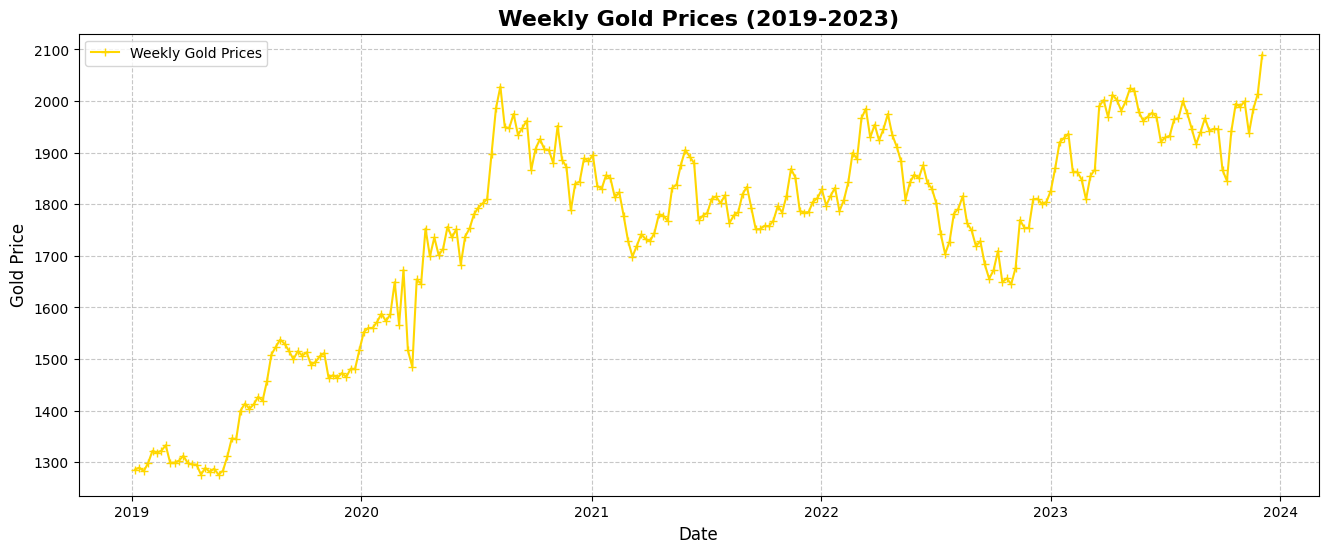

In [8]:
weekly_gold_prices = gold_price.resample('W').last() 
plt.figure(figsize=(16, 6))
plt.plot(weekly_gold_prices.index, weekly_gold_prices['Price'], label='Weekly Gold Prices', color='#ffd700', marker='+')
plt.title('Weekly Gold Prices (2019-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

In [9]:
news.head()

,Day,Date,Hour,Country,Event,Actual,Previous,Consensus,Forecast
0,Tuesday,01/01/19,20:45,CN,Caixin Manufacturing PMI DEC,49.7,50.2,50.1,50.1
1,Friday,01/04/19,8:30,US,Non Farm Payrolls DEC,312K,176K,177K,165K
2,Sunday,01/06/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN
3,Monday,01/07/19,10:00,CA,Ivey PMI s.a DEC,59.7,57.2,56.8,56.7
4,Monday,01/07/19,NaN,CN,US-China Trade Talks,NaN,NaN,NaN,NaN


In [10]:
print(news.shape)
summary(news)

(1876, 9)


,Missing Values,Data Type,Unique Choices
Day,0,object,7.0
Date,0,object,888.0
Hour,41,object,55.0
Country,0,object,7.0
Event,0,object,479.0
Actual,153,object,768.0
Previous,154,object,787.0
Consensus,356,object,592.0
Forecast,157,object,671.0


## Notes -
* All data types is object
* 888 unique dates from 1876 Dates i.e (each date can have many rows (Events))
* Missing values in ( Actual, Previous, Consensus, Forecast ) columns
* There is 479 in Event (Deduplication. example (Consumer Confidence DEC and Consumer Confidence JAN)
* The columns( Actual, Previous, Consensus, Forecast ) (Contain chars (%, M, B, K). example (Consumer Confidence DEC and Consumer Confidence JAN)

In [11]:
news['Event'].apply(lambda x: x[-4:]).unique()

array(['\xa0DEC', 'alks', '\xa0NOV', '\xa0JAN', '\xa0FEB', 'ress',
       '\xa0MAR', 'x\xa0Q1', '\xa0APR', 'e\xa005', 'I\xa005', 'a\xa005',
       's\xa005', 'Y\xa005', 'M\xa005', '\xa0JUN', 'x\xa0Q2', '\xa0JUL',
       '\xa0AUG', 'e 1Y', '\xa0SEP', 'x\xa0Q3', '\xa0OCT', 'x\xa0Q4',
       'utes', 'ture', 'line', '2019', 'ting', 'ech\xa0', 'ence', '2020',
       'irus', 'kage', 'l\xa005', 'dget', 'Plan', 'tion', 'ring',
       'age\xa0', 'ions', 'mony', 'sing', 'port', '-FEB', 'asts',
       'h\xa005', 'kets', 'king', 'arty', 'ment', 'sion', 'Rate',
       'Y\xa0Q4', 'v\xa0Q4', 'h\xa0Q4', 'l\xa0Q4', 'Q\xa0Q4', 'tem\xa0',
       'Y\xa0Q1', 'v\xa0Q1', 'h\xa0Q1', 'l\xa0Q1', 'Q\xa0Q1', 'Y\xa0Q2',
       'v\xa0Q2', 'h\xa0Q2', 'l\xa0Q2', 't\xa0Q2', 'Q\xa0Q2', 'Y\xa0Q3',
       'v\xa0Q3', 'h\xa0Q3', 'l\xa0Q3', 't\xa0Q3', 'Q\xa0Q3'],
      dtype=object)

In [12]:
def remove_suffix(event):
    if event.endswith(('\xa0JAN','\xa0FEB','\xa0MAR','\xa0APR','\xa005',
        '\xa0JUN','\xa0JUL','\xa0AUG','\xa0SEP','\xa0OCT','\xa0NOV',
                       '\xa0DEC','\xa0Q1','\xa0Q2','\xa0Q3','\xa0Q4')):
        return event[:-3]
    else:
        return event
news['Event'] = news['Event'].apply(remove_suffix)
print(f"Down to {len(news['Event'].unique())} Unique values for Event columns")

Down to 144 Unique values for Event columns


In [13]:
percentage_mask = news['Previous'].str.endswith('%')
percentage_mask.fillna(False, inplace=True)
news['Previous'] = news['Previous'].str.rstrip('%')
news.loc[percentage_mask, 'Previous'] = pd.to_numeric(news.loc[percentage_mask, 'Previous'], errors='coerce') / 100.0

C:\Users\shawn\AppData\Local\Temp\ipykernel_3588\1052689142.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  percentage_mask.fillna(False, inplace=True)


In [14]:
# Create a new column 'Multiplier' based on 'Previous' values
news['Multiplier'] = news['Previous'].str.extract(r'([BKM])', expand=False)

news['Previous'] = news['Previous'].str.replace(r'[BKM]', '', regex=True).astype(float)
news['Actual'] = news['Actual'].str.replace(r'[BKM]', '', regex=True).astype(float)
news['Consensus'] = news['Consensus'].str.replace(r'[BKM]', '', regex=True).astype(float)
news['Forecast'] = news['Forecast'].str.replace(r'[BKM]', '', regex=True).astype(float)

In [15]:
# Function to calculate percentage difference
def calculate_percentage_difference(row, value_column, actual_column):
    return abs((row[value_column] - row[actual_column]) / ((row[value_column] + row[actual_column] + 1) / 2)) * 100

# Apply the function to each row and create new columns 'D_Consensus' and 'D_Forecast'
news['D_Consensus'] = news.apply(lambda row: calculate_percentage_difference(row, 'Consensus', 'Actual'), axis=1)
news['D_Forecast'] = news.apply(lambda row: calculate_percentage_difference(row, 'Forecast', 'Actual'), axis=1)

news['Date'] = pd.to_datetime(news['Date'])

C:\Users\shawn\AppData\Local\Temp\ipykernel_3588\3036244955.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news['Date'] = pd.to_datetime(news['Date'])


In [16]:
summary(news)

,Missing Values,Data Type,Unique Choices,min,max,Mean,Median,Variance,deviation,Num Outliers
Day,0,object,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,0,datetime64[ns],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,41,object,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,0,object,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event,0,object,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actual,153,float64,NaN,-20500.0,4800.000000,-4.705783,0.035000,310961.105749,557.638867,7.0
Previous,1055,float64,NaN,-20687.0,4800.000000,-9.164140,34.100000,666068.985029,816.130495,3.0
Consensus,356,float64,NaN,-22000.0,3000.000000,-15.208312,0.031000,418879.382158,647.208917,4.0
Forecast,157,float64,NaN,-21780.0,2900.000000,-11.254396,0.032000,365741.781013,604.765889,6.0
Multiplier,1486,object,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


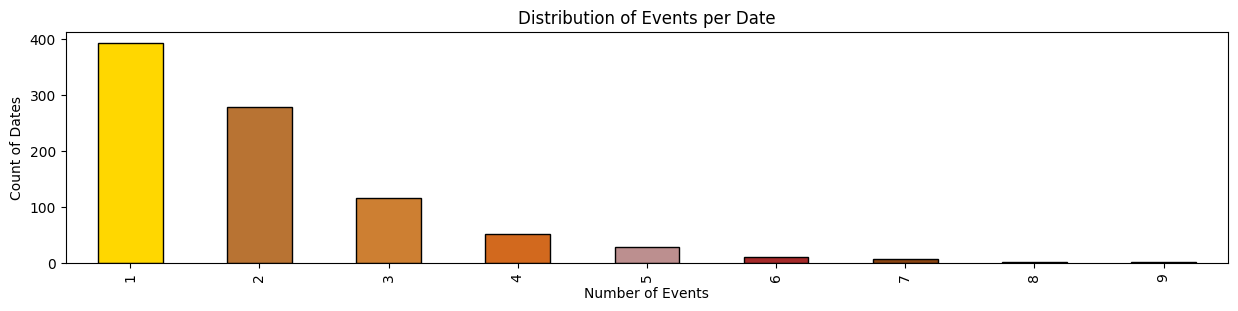

There are 394 dates with one event.


In [17]:

# Define a custom color palette with copper tones
custom_palette = ["#FFD700", "#B87333", "#CD7F32", "#D2691E", "#BC8F8F", "#A52A2A", "#8B4513"]

date_event_counts = news.groupby('Date')['Event'].nunique()
# Count the occurrences of each event count
event_count_distribution = date_event_counts.value_counts().sort_index()

# Plot the bar chart with the copper tone color palette
plt.figure(figsize=(15, 3))
event_count_distribution.plot(kind='bar', color=custom_palette, edgecolor='black')
plt.title('Distribution of Events per Date')
plt.xlabel('Number of Events')
plt.ylabel('Count of Dates')
plt.show()

print(f"There are {event_count_distribution[1]} dates with one event.")


## Associate one Date with One Event

In [18]:
country_priority = {'US': 1, 'EA': 2, 'GB': 3, 'JP': 4, 'CA': 5, 'CN': 6, 'RU': 7}
news['Country_Priority'] = news['Country'].map(country_priority)
# Sort by 'Country_Priority' and 'Date'
news.sort_values(by=['Country_Priority', 'Date'], inplace=True)
# Drop duplicates based on 'Date', keeping the first occurrence
news = news.drop_duplicates(subset='Date', keep='first')
# Drop the 'Country_Priority' column if you don't need it in the final result
news.drop(columns=['Country_Priority'], inplace=True)

C:\Users\shawn\AppData\Local\Temp\ipykernel_3588\2166861275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news.drop(columns=['Country_Priority'], inplace=True)


In [19]:
# Merge based on the 'Date' column
data = pd.merge(gold_price, news, on='Date', how='left')
print(data.shape)
data = data[["Date", "Price", "Vol_K", "Change_percent", "Country", "Event", "D_Consensus", "D_Forecast"]]
data.head()

(1279, 18)


,Date,Price,Vol_K,Change_percent,Country,Event,D_Consensus,D_Forecast
0,2023-12-01,2089.7,241.62,1.58,US,ISM Manufacturing PMI,1.888772,1.053741
1,2023-11-30,2057.2,151.92,-0.48,US,Core PCE Price Index MoM,0.000000,0.199005
2,2023-11-29,2067.1,197.79,0.81,US,GDP Growth Rate QoQ 2nd Est,0.362976,0.544959
3,2023-11-28,2050.5,1.86,1.35,NaN,NaN,NaN,NaN
4,2023-11-27,2023.1,1.06,0.47,NaN,NaN,NaN,NaN


In [20]:
data.head(30)

,Date,Price,Vol_K,Change_percent,Country,Event,D_Consensus,D_Forecast
0,2023-12-01,2089.70,241.62,1.58,US,ISM Manufacturing PMI,1.888772,1.053741
1,2023-11-30,2057.20,151.92,-0.48,US,Core PCE Price Index MoM,0.000000,0.199005
2,2023-11-29,2067.10,197.79,0.81,US,GDP Growth Rate QoQ 2nd Est,0.362976,0.544959
3,2023-11-28,2050.50,1.86,1.35,NaN,NaN,NaN,NaN
4,2023-11-27,2023.10,1.06,0.47,NaN,NaN,NaN,NaN
5,2023-11-24,2013.70,0.52,0.95,NaN,NaN,NaN,NaN
6,2023-11-23,1994.75,NaN,-0.43,JP,Inflation Rate YoY,NaN,0.187793
7,2023-11-22,2003.40,0.67,-0.43,US,Durable Goods Orders MoM,5.027322,5.664488
8,2023-11-21,2012.00,0.67,1.07,US,FOMC Minutes,NaN,NaN
9,2023-11-20,1990.70,0.31,0.30,NaN,NaN,NaN,NaN


In [21]:
summary(data)

,Missing Values,Data Type,min,max,Mean,Median,Variance,deviation,Num Outliers,Unique Choices
Date,0,datetime64[ns],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,0,float64,1272.00,2089.700000,1743.149062,1797.700000,42242.879221,205.530726,0.0,NaN
Vol_K,15,float64,0.00,813.410000,216.213473,200.515000,12971.563973,113.892774,5.0,NaN
Change_percent,0,float64,-4.99,5.950000,0.043206,0.040000,0.966090,0.982899,2.0,NaN
Country,472,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
Event,472,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0
D_Consensus,599,float64,0.00,752.830189,11.308194,1.097919,2253.849946,47.474730,94.0,NaN
D_Forecast,537,float64,0.00,7733.884298,33.955382,1.483586,96522.160809,310.680158,105.0,NaN


In [22]:
# Handle missing values (example: filling with median)
data['Vol_K'].fillna(data['Vol_K'].median(), inplace=True)
data['D_Consensus'].fillna(data['D_Consensus'].median(), inplace=True)
data['D_Forecast'].fillna(data['D_Forecast'].median(), inplace=True)

C:\Users\shawn\AppData\Local\Temp\ipykernel_3588\1062981010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vol_K'].fillna(data['Vol_K'].median(), inplace=True)
C:\Users\shawn\AppData\Local\Temp\ipykernel_3588\1062981010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


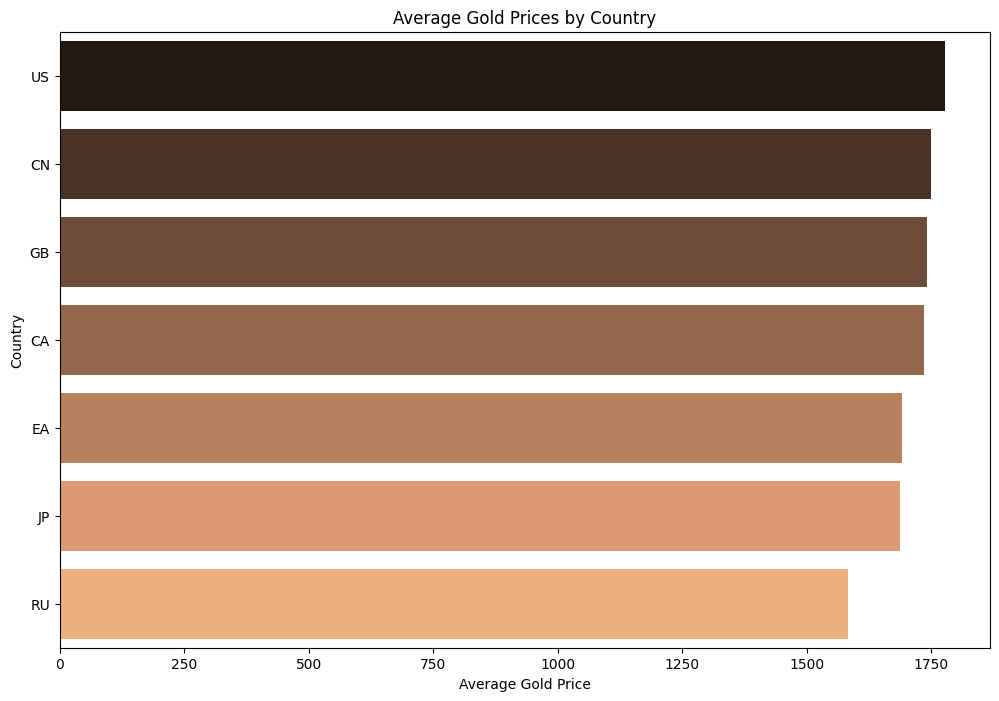

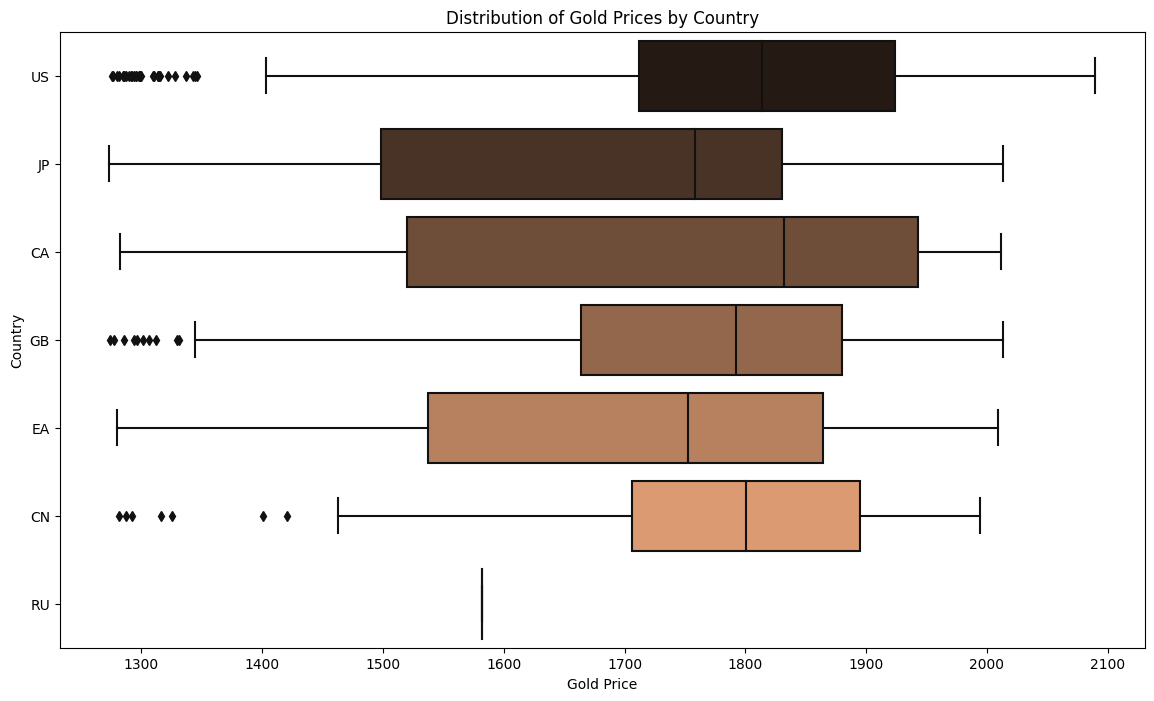

In [23]:
# Aggregate data by country
country_avg_prices = data.groupby('Country')['Price'].mean().reset_index()
# Sort countries by average price
country_avg_prices = country_avg_prices.sort_values(by='Price', ascending=False)
# Bar Plot of Average Gold Prices by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Country', data=country_avg_prices, palette='copper')
plt.title('Average Gold Prices by Country')
plt.xlabel('Average Gold Price')
plt.ylabel('Country')
plt.show()
# Box Plot of Gold Prices by Country
plt.figure(figsize=(14, 8))
sns.boxplot(x='Price', y='Country', data=data, palette='copper')
plt.title('Distribution of Gold Prices by Country')
plt.xlabel('Gold Price')
plt.ylabel('Country')
plt.show()

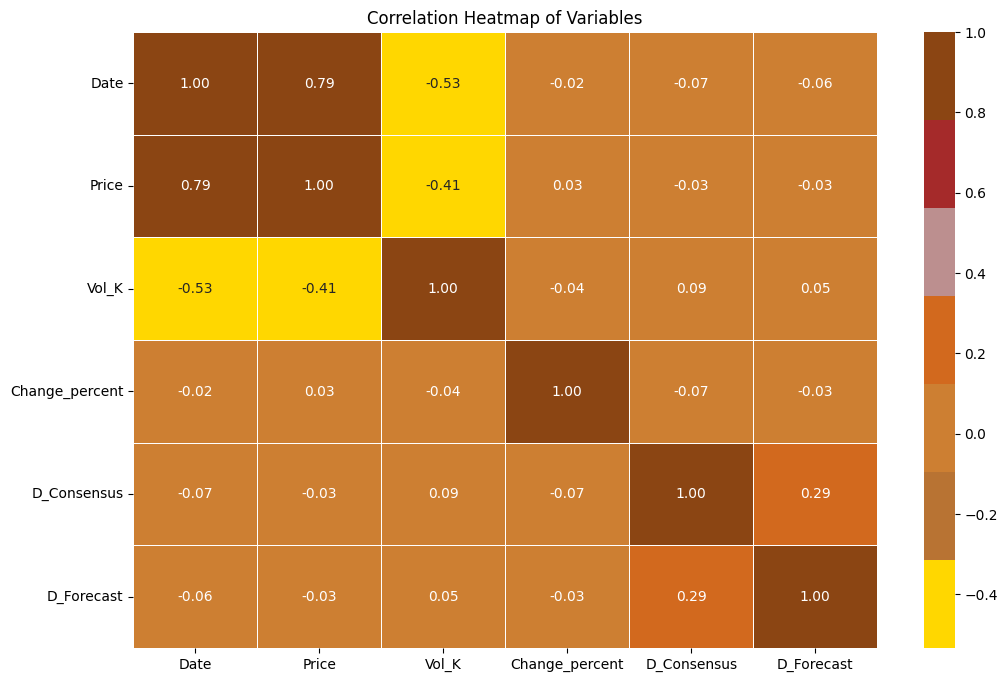

In [24]:

# Exclude non-numeric columns (assuming 'Country' is non-numeric)
numeric_data = data.drop(columns=['Country', 'Event'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Define custom color palette with copper and gold tones
custom_palette = ["#FFD700", "#B87333", "#CD7F32", "#D2691E", "#BC8F8F", "#A52A2A", "#8B4513"]

# Plot heatmap with custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(custom_palette), fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()



C:\Users\shawn\AppData\Local\Temp\ipykernel_3588\847878419.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = data.set_index('Date').resample('Q').agg({'Price': 'mean', 'Vol_K': 'mean'})


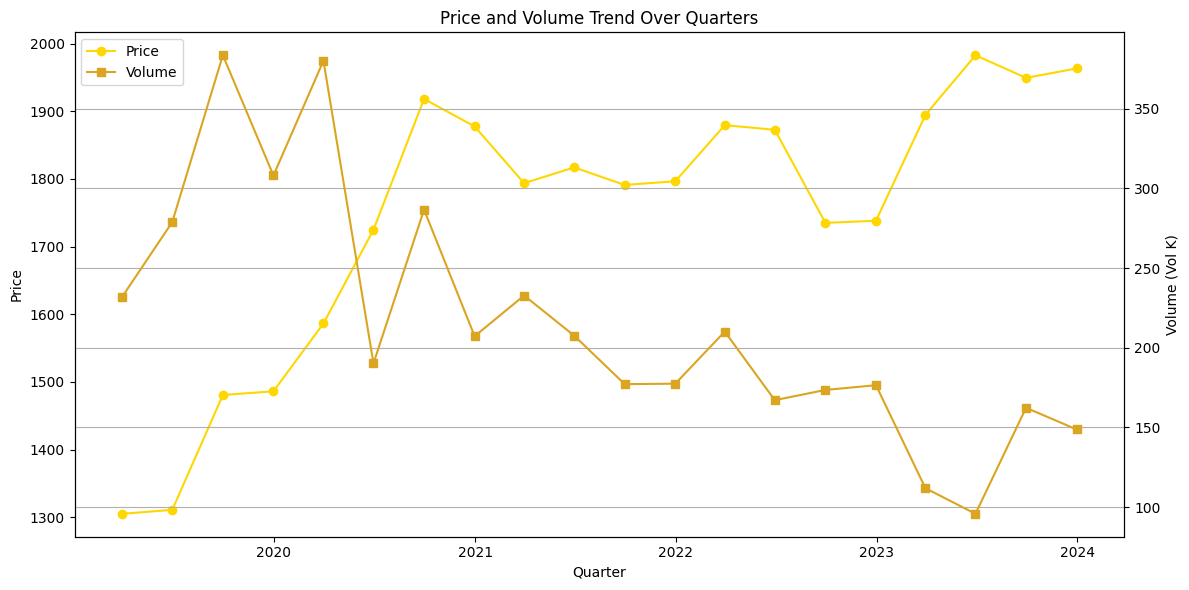

In [25]:

# Resample data by quarter and calculate the average price and volume for each quarter
quarterly_data = data.set_index('Date').resample('Q').agg({'Price': 'mean', 'Vol_K': 'mean'})

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Price trend
ax1.plot(quarterly_data.index, quarterly_data['Price'], marker='o', linestyle='-', color='#FFD700', label='Price')  # Gold color
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Price', color='Black')  # Gold color
ax1.tick_params('y', colors='Black')  # Gold color

# Create a secondary y-axis for Volume
ax2 = ax1.twinx()
ax2.plot(quarterly_data.index, quarterly_data['Vol_K'], marker='s', linestyle='-', color='#DAA520', label='Volume')  # Dark gold color
ax2.set_ylabel('Volume (Vol K)', color='Black')  # Dark gold color
ax2.tick_params('y', colors='Black')  # Dark gold color

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Price and Volume Trend Over Quarters')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [26]:
def assign_sentiment(change_percent, event):
  """Assigns sentiment based on the change percent value, considering empty events.

  Args:
      change_percent (float): The percent change in price.
      event (str): The event associated with the price change (may be empty).

  Returns:
      str: "Positive" if change_percent is positive, "Negative" if negative, 
           "Neutral" otherwise, or "Neutral" if event is empty.
  """
  # Check if event is None (missing value) or an empty string after stripping
  if pd.isna(event) or (isinstance(event, str) and event.strip() == ''):
    return "Neutral"
  elif change_percent > 0:
    return "Positive"
  elif change_percent < 0:
    return "Negative"
  else:
    return "Neutral"

# Add a new 'Sentiment' column with sentiment values based on 'Change_percent'
data['Sentiment'] = data.apply(lambda row: assign_sentiment(row['Change_percent'], row['Event']), axis=1)

# Save the data to a CSV file
# data.to_csv('sentiment_labeled_data.csv', index=False)

print(data)


           Date   Price   Vol_K  Change_percent Country  \
0    2023-12-01  2089.7  241.62            1.58      US   
1    2023-11-30  2057.2  151.92           -0.48      US   
2    2023-11-29  2067.1  197.79            0.81      US   
3    2023-11-28  2050.5    1.86            1.35     NaN   
4    2023-11-27  2023.1    1.06            0.47     NaN   
...         ...     ...     ...             ...     ...   
1274 2019-01-08  1285.9  221.92           -0.31      EA   
1275 2019-01-07  1289.9  204.68            0.32      CA   
1276 2019-01-04  1285.8  316.06           -0.70      US   
1277 2019-01-03  1294.8  244.54            0.83     NaN   
1278 2019-01-02  1284.1  235.33            0.22     NaN   

                            Event  D_Consensus  D_Forecast Sentiment  
0          ISM Manufacturing PMI      1.888772    1.053741  Positive  
1       Core PCE Price Index MoM      0.000000    0.199005  Negative  
2     GDP Growth Rate QoQ 2nd Est     0.362976    0.544959  Positive  
3      

## SENTIMENT ANALYSIS FOR EVENTS

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('C:/Users/shawn/OneDrive/Documents/GitHub/ML-Crate/Dataset/sentiment_labeled_data.csv')


# Encode categorical features
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'].fillna('Unknown'))
data['Event'] = label_encoder.fit_transform(data['Event'])

# Define features and target
features = ['Price', 'Vol_K', 'Change_percent', 'D_Consensus', 'D_Forecast', 'Country', 'Event']
X = data[features]
y = data['Sentiment']

# Encode target labels
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_name=[]
model_accu = []

## RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

model_name.append('Random Forest')
model_accu.append(accuracy_score(y_test, y_pred))



Accuracy: 0.99609375
              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99        85
     Neutral       1.00      0.99      0.99        93
    Positive       1.00      1.00      1.00        78

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



## SVM

In [29]:
from sklearn.svm import SVC

# Train a Support Vector Classifier
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

model_name.append('SVM')
model_accu.append(accuracy_score(y_test, y_pred))



Accuracy: 0.9765625
              precision    recall  f1-score   support

    Negative       0.99      0.96      0.98        85
     Neutral       1.00      0.97      0.98        93
    Positive       0.94      1.00      0.97        78

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256



## LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

model_name.append('Logistic Regression')
model_accu.append(accuracy_score(y_test, y_pred))



Accuracy: 0.97265625
              precision    recall  f1-score   support

    Negative       0.97      0.98      0.97        85
     Neutral       0.98      0.96      0.97        93
    Positive       0.97      0.99      0.98        78

    accuracy                           0.97       256
   macro avg       0.97      0.97      0.97       256
weighted avg       0.97      0.97      0.97       256



## GRADIENT BOOSTER 

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

model_name.append('Gradient Boosting')
model_accu.append(accuracy_score(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        85
     Neutral       1.00      1.00      1.00        93
    Positive       1.00      1.00      1.00        78

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



In [32]:
model_comp=pd.DataFrame({'Models':model_name, 'Accuracies':model_accu})
model_comp

,Models,Accuracies
0,Random Forest,0.996094
1,SVM,0.976562
2,Logistic Regression,0.972656
3,Gradient Boosting,1.000000


<Axes: xlabel='Models'>

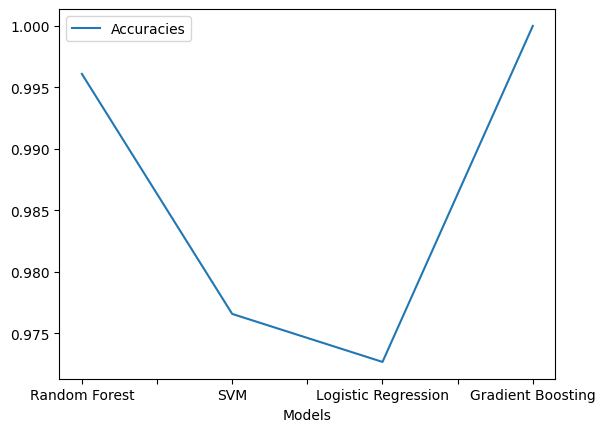

In [33]:
model_comp.plot(x='Models',y='Accuracies')